In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_name = "2007_000063"
voc12_ext = ".jpg"
gt_ext = ".png"

image = cv2.imread("data/voc12/" + img_name + voc12_ext)
image_gt = cv2.imread("data/gt/" + img_name + gt_ext)

mask_rgb = cv2.imread("data/mask3.png")
mask = np.zeros((mask_rgb.shape[0], mask_rgb.shape[1]), dtype=np.uint8)

In [3]:
for i in range(mask_rgb.shape[0]):
    for j in range(mask_rgb.shape[1]):
        if mask_rgb[i,j,0] == 0 and mask_rgb[i,j,1] == 0 and mask_rgb[i,j,2] == 255:
            mask[i,j] = cv2.GC_PR_FGD
        elif mask_rgb[i,j,0] == 255 and mask_rgb[i,j,1] == 255 and mask_rgb[i,j,2] == 255:
            mask[i,j] = cv2.GC_FGD

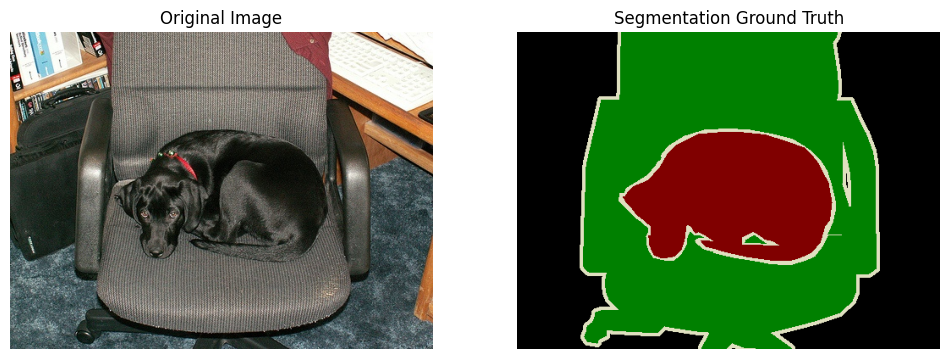

In [4]:
fig = plt.figure(figsize=(12, 6))

rows = 1
cols = 2

fig.add_subplot(rows, cols, 1)
plt.axis("off")
plt.title("Original Image")
plt.imshow(image[:,:,::-1])

fig.add_subplot(rows, cols, 2)
plt.axis("off")
plt.title("Segmentation Ground Truth")
plt.imshow(image_gt[:,:,::-1])

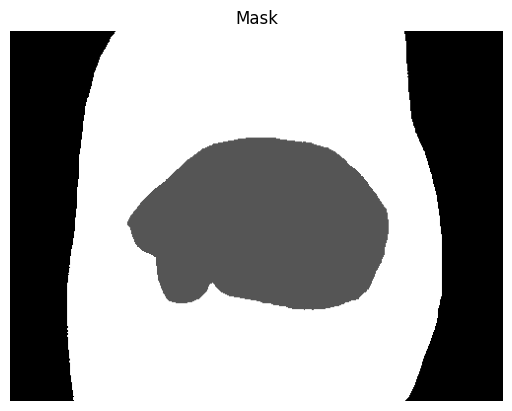

In [5]:
plt.axis("off")
plt.title("Mask")
plt.imshow(mask, cmap="gray")

In [6]:
bgd_model = np.zeros((1,65),np.float64)
fgd_model = np.zeros((1,65),np.float64)
mask, bgd_model, fgd_model = cv2.grabCut(image, mask, None, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_MASK)

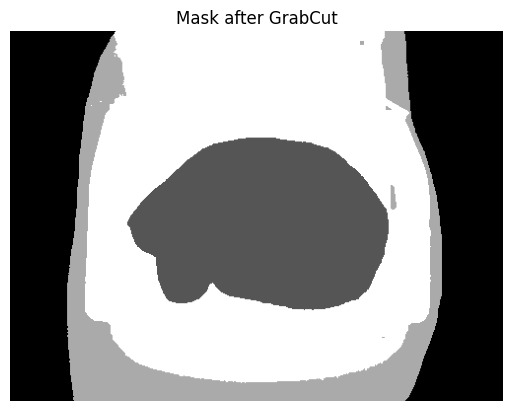

In [7]:
plt.axis("off")
plt.title("Mask after GrabCut")
plt.imshow(mask, cmap="gray")

In [8]:
mask = np.where((mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD), 1, 0)

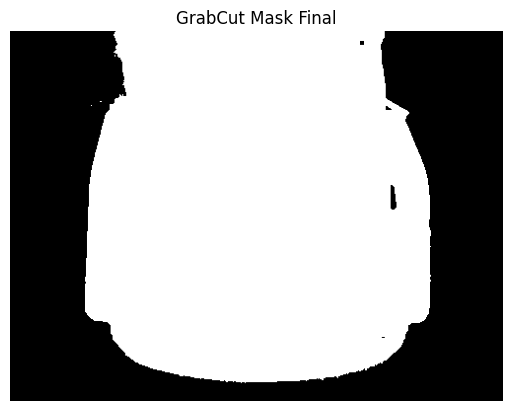

In [9]:
plt.axis("off")
plt.title("GrabCut Mask Final")
plt.imshow(mask, cmap="gray")

In [10]:
segmented = image * cv2.merge([mask,mask,mask])

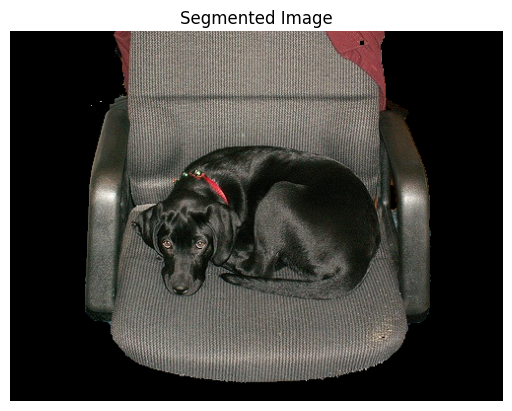

In [11]:
plt.axis("off")
plt.title("Segmented Image")
plt.imshow(segmented[:,:,::-1])